# Quanta Cerveja os Universitários Consumirão no seu Bar?

Cerveja é uma das bebida mais demográticas e consumida no mundo todo. A verdade é que em todo o mundo, milhares de pessoas consomem a bebida regularmente e também em diferentes situações. 

Não é por acaso, existem muitos bares em todos os lugares, principalmente em torno das cidades universitárias. Universitários adoram festeja e a cerveja está sempe presente. Ter um bar universitário parece ser um bom negócio. Um dono de bar deve ter um bom estoque e cerveja para dias de grnde demanda para não desapontar seus clientes.

## Objetivo

O objetivo deste projeto é prever o consumo de cerveja, usando modelos de regressão linear, para os dias de maior e menor consumo, podendo assim ter um controle de estoque de cerveja em um bar universitário.

# Datasets

O dataset usado disponibiliza o consumo em litros de cerveja registrado por dia durante todo o ano de 2015. Os dados foram coletados em uma região de bares universitários na cidade de São Paulo, onde existem muitas festas com grupos de estudantes universitários de 18 a 28 anos de idade (em média). Foram coletados também registros diários de temperatura (máxima, mínima e média), precipitação e finais de semana (anotado como 1) ou dias de semana (anotado com 0). Também usados outro conjunto de dados dos dias que foram feriados no ano de 2015.

Os datasets foram obtidos do Kaggle, uma das maiores comunidade de data science.

Link dos dados do consumo de cerveja: <a href="https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo" target='_blank'> Kaggle - Beer Consumption - Sao Paulo </a>

Link dos dados dos feriados em São Paulo: <a href="https://www.kaggle.com/hebertalbertin/feriados-sao-paulo-2015" target='_blank'> Kaggle - Feriados Sao Paulo 2015 </a>

## 1. Importando Bibliotecas

In [106]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('mode.chained_assignment', None)

import re
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_val_predict

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, BayesianRidge, Lasso, LassoCV,ElasticNet, ElasticNetCV, SGDRegressor, HuberRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [107]:
 #Importando os dados
 dados = pd.read_csv("consumo_cerveja.csv")
 
 dados

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
print("O dataset possui")
print("Linhas:", dados.shape[0])
print("Colunas:", dados.shape[1])

O dataset possui
Linhas: 941
Colunas: 7


In [109]:
# Importando os dados dos feriados 

feriados = pd.read_csv("feriados_sao_paulo_2015.csv")
feriados['Dia'] = pd.to_datetime(feriados['Dia'])
feriados

,Dia,Feriado
0,2015-01-01,Ano Novo
1,2015-01-25,Aniversário da Cidade
2,2015-02-16,Carnaval
3,2015-02-17,Carnaval
4,2015-02-18,Carnaval
5,2015-04-03,Sexta-Feira Santa
6,2015-04-03,Sexta-feira Santa
7,2015-04-21,Dia de Tiradentes
8,2015-05-01,Dia do Trabalho
9,2015-06-04,Corpus Christi


## 2. Limpeza e Análise Exploratória dos Dados

O dataset dos feriados possui dados repetidos que devem ser retirados

In [110]:
# apaga dados duplicados
feriados = feriados.drop_duplicates(subset=["Dia"]).reset_index(drop=True)
feriados

,Dia,Feriado
0,2015-01-01,Ano Novo
1,2015-01-25,Aniversário da Cidade
2,2015-02-16,Carnaval
3,2015-02-17,Carnaval
4,2015-02-18,Carnaval
5,2015-04-03,Sexta-Feira Santa
6,2015-04-21,Dia de Tiradentes
7,2015-05-01,Dia do Trabalho
8,2015-06-04,Corpus Christi
9,2015-07-09,Revolução Constitucionalista


In [111]:
#Informações dos tipos de dados nas colunas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


Existem 365 linhas de dados não nulos de um total de 941 linhas. Das 7 colunas existentes, somente 2 são numéricas.

Vamos visualizar os valores nulos em noso dataset.

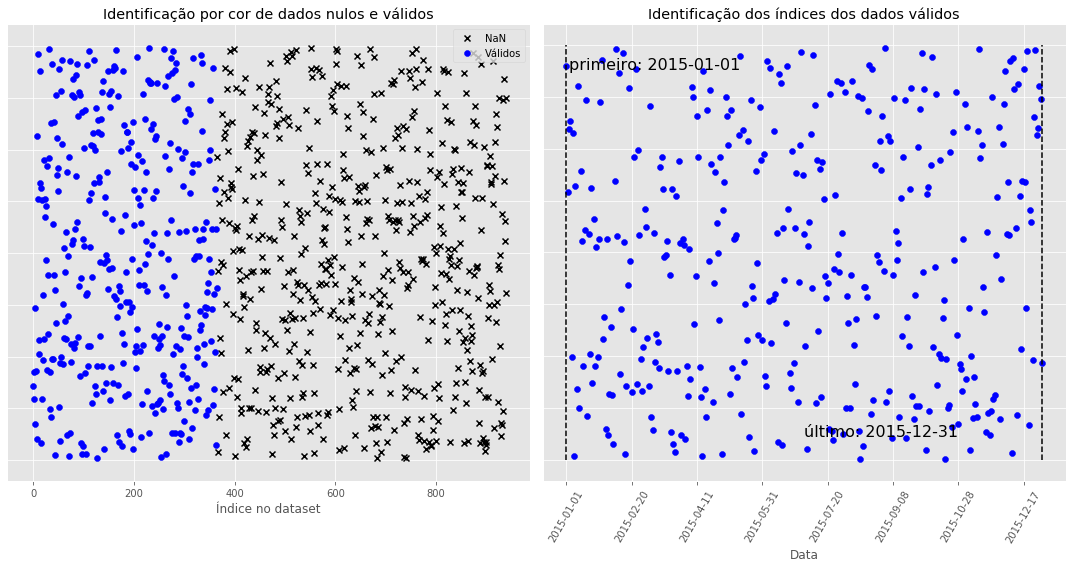

In [112]:
#Contabilizando dos dados nulos (Nan)

indicesNulos = dados['Consumo de cerveja (litros)'].isna()  

listaNaN = dados[indicesNulos].index.tolist()
listaValidos = dados[~indicesNulos].index.tolist()

fig, ax = plt.subplots(1,2,figsize=(15,8))
ax[0].scatter(listaNaN, np.random.random(len(listaNaN))*2, marker='x', color='black')
ax[0].scatter(listaValidos, np.random.random(len(listaValidos))*2, marker='o', color='blue')
ax[0].set_xlabel('Índice no dataset')
ax[0].legend(['NaN','Válidos'],loc='upper right')
ax[0].tick_params(axis='y',which='both',left=False,bottom=False,labelleft=False)
ax[0].set_title('Identificação por cor de dados nulos e válidos')


ax[1].scatter(dados.iloc[listaValidos,0],np.random.random(len(listaValidos))*2,marker='o',c='b')
primeiroRegistro = dados.iloc[listaValidos[0],0]
ultimoRegistro = dados.iloc[listaValidos[-1],0]
ax[1].plot([primeiroRegistro,primeiroRegistro],[0,2],c='black',linestyle='--')
ax[1].plot([ultimoRegistro,ultimoRegistro],[0,2],c='black',linestyle='--')
ax[1].set_xlabel('Data')
ax[1].set_title('Identificação dos índices dos dados válidos')
ax[1].tick_params(axis='y',which='both',left=False,bottom=False,labelleft=False)
ax[1].xaxis.set_major_locator(ticker.AutoLocator()) 
ax[1].tick_params(labelrotation=60)
ax[1].annotate('primeiro: {}'.format(dados.iloc[listaValidos[0],0]),xy=(0.05, 0.9),
                xycoords='axes fraction',fontsize=16)
ax[1].annotate('último: {}'.format(dados.iloc[listaValidos[-1],0]),xy=(0.50, 0.1), 
                xycoords='axes fraction',fontsize=16)

plt.tight_layout()
plt.show()

Essa análise visual mostra que os registos válidos são apenas as primeiras 365 linhas, correspondendo a um ano de registro (entre 01-01-2015 a 31-12-2015).

Uma vez entendido os dados nulos, podemos excluí-los.

In [113]:
#Excluindo dados nulos
dados = dados.dropna(axis=0)

print("O dataset válido possui")
print("Linhas:", dados.shape[0])
print("Colunas:", dados.shape[1])


O dataset válido possui
Linhas: 365
Colunas: 7


As colunas de 1 a 4 possuem os decimais representados por "," e precisam ser torcados por "."

In [114]:
colunas =['Temperatura Media (C)', 'Temperatura Minima (C)' , 'Temperatura Maxima (C)', 'Precipitacao (mm)']

for coluna in colunas:
    dados[coluna] = dados[coluna].str.replace(',','.').astype(np.float)

### a) Vamos dividir as precipitações em quatro categorias baseadas em suas quantidades para saber se a precipitação afeta o consumo de cerveja.

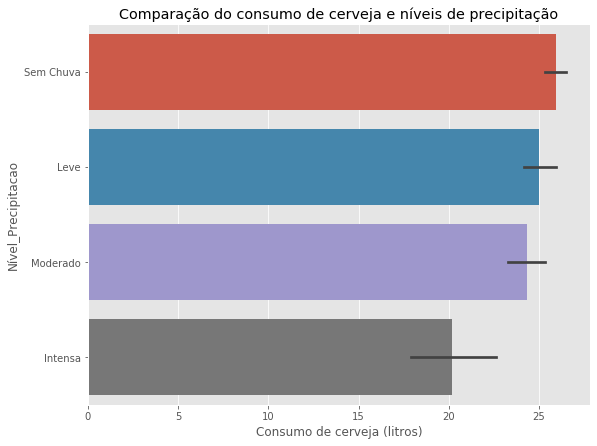

In [115]:
def prec(linha):
    if linha > 50:
        return "Intensa"

    elif linha > 10:
        return "Moderado"

    elif linha > 0:
        return "Leve"

    elif linha == 0:
        return "Sem Chuva"
         
dados["Nível_Precipitacao"] = dados["Precipitacao (mm)"].apply(prec) 

plt.figure(figsize=(9,7))
sns.barplot(x=dados["Consumo de cerveja (litros)"], y=dados["Nível_Precipitacao"])
plt.title("Comparação do consumo de cerveja e níveis de precipitação")
plt.show()

Insight:

* O maior consumo de cerveja ocorrem quando não está chovendo.

* Mesmo em dias com chuvas (leve ou moderada) ainda existe um alto consumo de cerveja.

* O consumo médio durante chuvas intensas é ligeiramente menor que nas outros condições.

### b) Comparar o consumo de cerveja com a temperatura máxima através de três padrões categóricos: "Quente", "Agradável" e "Frio".

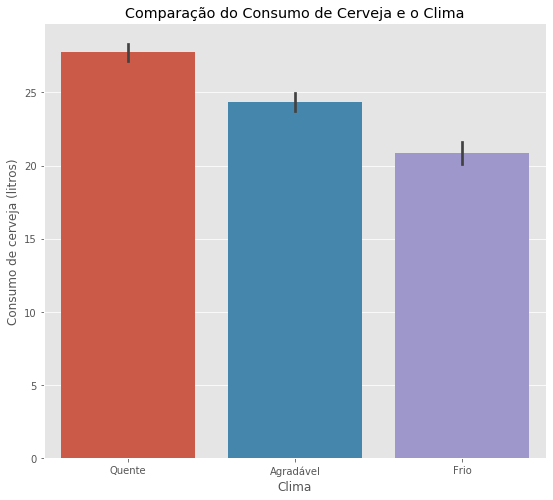

In [116]:
def temp(linha):
    if linha > 27:
        return "Quente"

    elif linha > 22:
        return "Agradável"

    elif linha > 0:
        return "Frio"

         
dados["temp_grupo"] = dados["Temperatura Maxima (C)"].apply(temp) 

plt.figure(figsize=(9,8))
sns.barplot(x= dados["temp_grupo"], y=dados["Consumo de cerveja (litros)"])
plt.title("Comparação do Consumo de Cerveja e o Clima")
plt.xlabel("Clima")
plt.show()

Insigths:

* O consumo de cerveja é maior em dias de clima quente.

* Mesmo em dias frios, ainda existe um grande consumo de cerveja.

### c) Consumo de cerveja em relação as condições climáticas nos finais de semana (1) e dias e semana (0).

<Figure size 1296x1080 with 0 Axes>

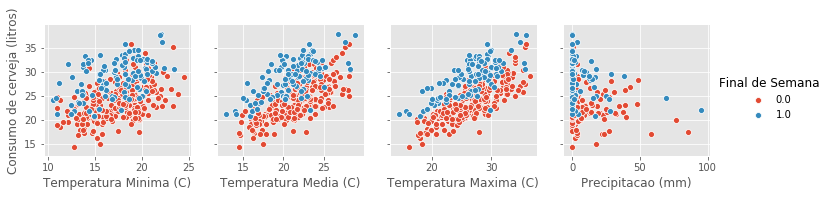

In [117]:
plt.figure(figsize=(18,15))
sns.pairplot(dados,x_vars=['Temperatura Minima (C)','Temperatura Media (C)','Temperatura Maxima (C)',
                        'Precipitacao (mm)'],y_vars=['Consumo de cerveja (litros)'],
                        hue='Final de Semana')
plt.show()

Insigths:

* Independentemente das condições climáticas, o consumo de cerveja é sempre maior nos finais de semana.

* O Consumo de cerveja tende a ser maior quando os termômetros marcam temperaturas mais elevadas

*  Dias sem chuvas o consumo é maior.

### d) Analisar o consumo de cerveja baseado nos dias da semana, dias úteis e feriados.

Primeiro temos que adicionar novas colunas com os dados de dias da semana, dias íteis, meses e feriados.

In [118]:
# altera o formato par tipo np.date
dados['Data'] = pd.to_datetime(dados['Data'])

# dicionário com os dias da semana
dados["Dia da Semana"] =  dados["Data"].dt.dayofweek
dados["Dia da Semana"] = dados["Dia da Semana"].map(
                        {0:"Seg", 1:"Ter", 2:"Qua", 3:"Qui", 4:"Sex", 5:"Sab", 6:"Dom"})

# 
dados["Feriado"] = [dia in list(feriados["Dia"]) for dia in dados["Data"]]
dados["Dia útil"] = ~(dados["Final de Semana"].astype(bool) | dados["Feriado"])

dados["Dia útil"] = dados["Dia útil"].astype(int)
dados["Feriado"] = dados["Feriado"].astype(int)

dados['Mês'] = pd.DatetimeIndex(dados['Data']).month.map(
                {1:"Jan", 2:"Fev", 3:"Mar", 4:"Abr", 5:"Mai", 6:"Jun",
                 7:"Jul", 8:"Ago", 9:"Set", 10:"Out", 11:"Nov", 12:"Dez"})

In [119]:
# Exibe o ataset com as novas colunas
dados

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Nível_Precipitacao,temp_grupo,Dia da Semana,Feriado,Dia útil,Mês
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,Sem Chuva,Quente,Qui,1,0,Jan
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,Sem Chuva,Quente,Sex,0,1,Jan
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,Sem Chuva,Quente,Sab,0,0,Jan
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,Leve,Quente,Dom,0,0,Jan
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,Sem Chuva,Quente,Seg,0,1,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307,Moderado,Quente,Dom,0,0,Dez
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095,Sem Chuva,Agradável,Seg,0,1,Dez
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309,Moderado,Agradável,Ter,0,1,Dez
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467,Leve,Agradável,Qua,0,1,Dez


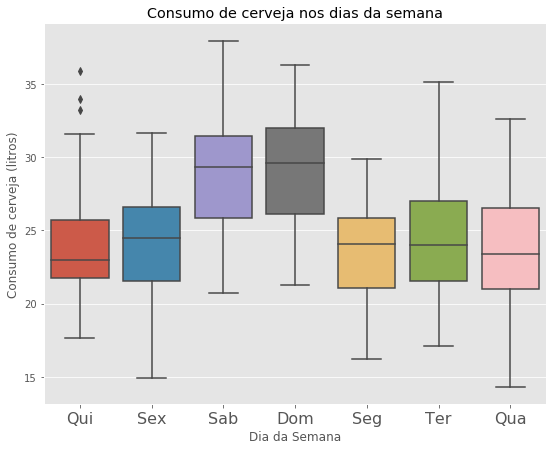

In [120]:
# desenha gráficos de barras para o consumo durante os dias da semana
plt.figure(figsize=(9,7))
fig = sns.boxplot(x="Dia da Semana", y="Consumo de cerveja (litros)", data=dados)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=16)
fig.set_title("Consumo de cerveja nos dias da semana")
plt.show()

Insigths:

* Os dias da semana onde se consomem mais cerveja são Sábado e Domingo.

* Os dias de menor consumo de cerveja são Quinta e Quarta.

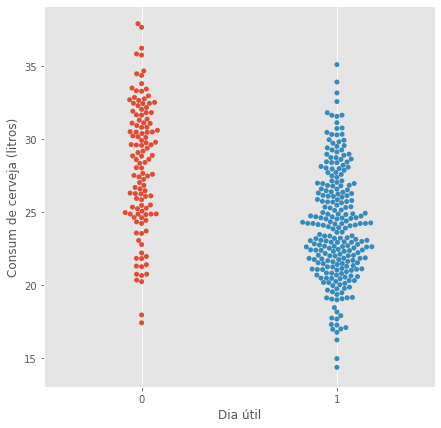

In [121]:
plt.figure(figsize=(7,7))
sns.swarmplot(x="Dia útil", y="Consumo de cerveja (litros)", data=dados)
plt.grid()
plt.xlabel("Dia útil")
plt.ylabel("Consum de cerveja (litros)")
plt.show()

Insigths:

* O gráfico acima representa a ditribuição as densidades do consumo de cerveja no dia útil (1) ou não (0). 

* Nos dias não úteis (feriados e finais de semana) são consumidos diferentes quantidades e litros de cerveja, inclusive acima de 35 litros.

* Nos dias úteis, existe uma tendência de um consumo de 22-24 litros de cerveja.

In [122]:
#Selecionar apenas os dias de feriado em um novo dataset
feriados_dados = dados.loc[(dados["Feriado"] == 1)]

#cria uma lista com o nome dos feriados
f = []
for d in feriados["Feriado"]:
    f.append(d)

#Adiciona os nomes dos feriados do datast
feriados_dados["Comemoracao"] = f

feriados_dados

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Nível_Precipitacao,temp_grupo,Dia da Semana,Feriado,Dia útil,Mês,Comemoracao
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,Sem Chuva,Quente,Qui,1,0,Jan,Ano Novo
24,2015-01-25,24.40,18.1,30.0,0.0,1.0,31.088,Sem Chuva,Quente,Dom,1,0,Jan,Aniversário da Cidade
46,2015-02-16,21.60,18.8,27.3,22.7,0.0,25.343,Moderado,Quente,Seg,1,0,Fev,Carnaval
47,2015-02-17,22.76,19.7,28.0,85.3,0.0,17.399,Intensa,Quente,Ter,1,0,Fev,Carnaval
48,2015-02-18,22.22,19.9,26.4,13.4,0.0,21.392,Moderado,Agradável,Qua,1,0,Fev,Carnaval
92,2015-04-03,21.02,16.3,27.2,0.0,0.0,24.867,Sem Chuva,Quente,Sex,1,0,Abr,Sexta-Feira Santa
110,2015-04-21,22.52,19.3,29.0,0.0,0.0,31.108,Sem Chuva,Quente,Ter,1,0,Abr,Dia de Tiradentes
120,2015-05-01,17.34,13.4,22.0,0.0,0.0,17.939,Sem Chuva,Frio,Sex,1,0,Mai,Dia do Trabalho
154,2015-06-04,18.36,14.6,24.1,0.0,0.0,22.772,Sem Chuva,Agradável,Qui,1,0,Jun,Corpus Christi
189,2015-07-09,17.54,15.3,20.4,0.0,0.0,20.740,Sem Chuva,Frio,Qui,1,0,Jul,Revolução Constitucionalista


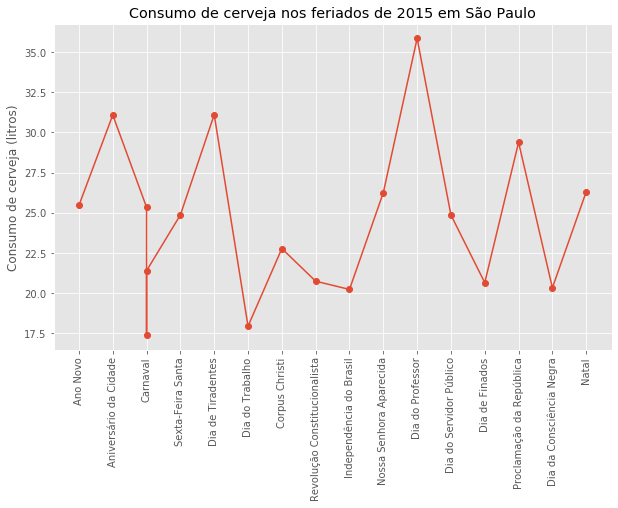

In [123]:
plt.figure(figsize=(10,6))
plt.plot(feriados_dados["Comemoracao"], feriados_dados["Consumo de cerveja (litros)"], marker="o")
plt.xticks(rotation=90)
plt.title("Consumo de cerveja nos feriados de 2015 em São Paulo")
plt.ylabel("Consumo de cerveja (litros)")
plt.tight_layout
plt.show()

Insigths:

* Os feriados onde se consumiu maior quantidade de cerveja foram o Dia do Professor, aniversário da cidade, Tiradentes e Proclamação da República;

* O de menor consumo foi durante carnaval e o dia do trabalho, finados e dia da consciência negra.

Pela análise anterior, não podemos tirar uma conclusão sobre a influência direta de um feriado em específico com o consumo de cerveja. Para isso, vamos ver quais foram os dias da semana que ocorreram os respectivos feriados de maior e menor consumo em 2015.

In [124]:
# Listas com os feriados
feriados_maior_consumo = ['Aniversário da Cidade','Dia de Tiradentes', 'Dia do Professor','Proclamação da República']
feriados_menor_consumo = ['Carnaval', 'Dia do Trabalho','Dia de Finados','Dia da Consciência Negra']

# Pega o dia da semana que ocorreu o feriado em 2015
lista_maior = []
for maior in feriados_maior_consumo:
    f = feriados_dados.loc[feriados_dados["Comemoracao"] == maior]["Dia da Semana"].values
    lista_maior.append(f)

lista_menor = []
for menor in feriados_menor_consumo:
    fd = feriados_dados.loc[feriados_dados["Comemoracao"] == menor]["Dia da Semana"].values
    lista_menor.append(fd)


In [125]:
# Dataframe com o resultado da busca 
consumo_feriados = pd.DataFrame()
consumo_feriados["Maior_Consumo"] = lista_maior
consumo_feriados["Menor_Consumo"] = lista_menor
consumo_feriados

,Maior_Consumo,Menor_Consumo
0,[Dom],"[Seg, Ter, Qua]"
1,[Ter],[Sex]
2,[Qui],[Seg]
3,[Dom],[Sex]


Insigth:

* Os feriados que tiveram maior consumo e cerveja ocorreram na terça, quarta ou domingo

* Os feriados que tiveram menor consumo de cerveja ocorreram na segunda, sexta e nos 3 dias de carnaval (seg, ter, qua).
Vemos que nos finais de semana prolongados (feriados na seg ou sex), devido a baixa circulação de universitários, o consumo diminui.

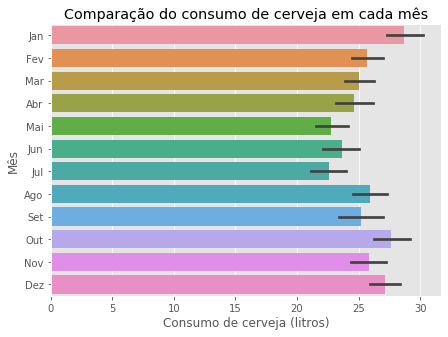

In [126]:
# Meses de maior consumo de cerveja
plt.figure(figsize=(7,5))
sns.barplot(x=dados["Consumo de cerveja (litros)"], y=dados["Mês"])
plt.title("Comparação do consumo de cerveja em cada mês")
plt.show()

Insigths:

* Janeiro, Outubro e Dezembro foram os meses com o maior consumo de cerveja.

* Julho, Junho e Maio os de menor consumo.

### d) Analisar a correlação entre as variáveis

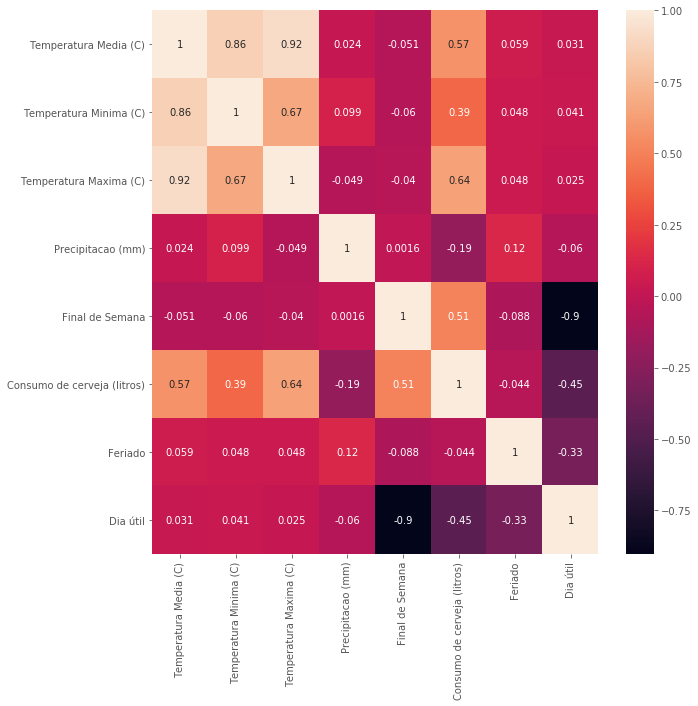

In [127]:
plt.figure(figsize=(10,10))
sns.heatmap(dados.corr(), annot=True)

Insitgh:

* O mapa de calor oferece representação visual e numérica do grau de correlação entre os dados.

* Valores próximos a 0 indicam baixa ou nenhuma correlação e valores próximos a 1 (diretamente proporcional) ou -1 (inversamente proporcional) refletem alta correlação.

## 3. Modelos de Regressão Linear

A regressão linear visa encontrar a melhor linha reta que ajusta os dados. 
Este modelo pressupõe que exite uma relação linear entre os preditores (Temperatura, precipitação, dia da semana) e o resultado (consumo de cerveja)

In [128]:
#Dividir os dados em X e y
y = dados['Consumo de cerveja (litros)'].copy()
X = dados.drop(['Data','Nível_Precipitacao', 'temp_grupo', 'Mês',  
                'Dia da Semana','Consumo de cerveja (litros)'], axis=1).copy()

X = pd.get_dummies(X)

# Padronizar X 
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [129]:
# Divide o dataset em conjunto de treino(train) e de teste(test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

A multicolinearidade ocorre quando há duas ou mais variáveis independentes em um modelo de regressão múltipla, as quais possuem alta correlação entre si. Quando alguns recursos são altamente correlacionados, podemos ter dificuldade em distinguir entre seus efeitos individuais na variável dependente. A multicolinearidade pode ser detectada usando várias técnicas, sendo uma delas o Variance Inflation Factor (VIF) 


In [130]:
vif = pd.DataFrame()
vif["features"] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X.shape[1])]
vif["VIF Factor"] = round(vif["VIF Factor"],2)
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif

,features,VIF Factor
6,Dia útil,38.22
4,Final de Semana,34.12
0,Temperatura Media (C),23.55
2,Temperatura Maxima (C),11.10
5,Feriado,7.33
1,Temperatura Minima (C),6.45
3,Precipitacao (mm),1.03


Insigth:

* Da análise udando VIF, vemos que as variáveis que mais influenciam o consumo e cerveja são: dia útil, final de semana, temperatura média.

Agora vamos partir para a criação de modelos que possam efetivamente prever a quantidade de cerveja que será consumida em um dia.

In [158]:
# Criamos um dicionário listando diferentes tipos de modelos regressores

models = {
    'Liner Regression' : LinearRegression(),
    'Ridge Regression' : Ridge(),
    'RidgeCV': RidgeCV(cv=10),
    'Lasso Regression': Lasso(),
    'LassoCV Regression': LassoCV(cv=10),
    'ElasticNet Regression': ElasticNet(),
    'ElasticCV Regression': ElasticNetCV(cv=10),
    'SGD Regression': SGDRegressor(),
    'SVR RBF': SVR(kernel = 'linear'),
    'Huber Regression': HuberRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'AdaBoost Regression': AdaBoostRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}

In [159]:
Resultados = pd.DataFrame()

for name, model in models.items():
        # Treina o modelo com os dados de treino
        modelo = model.fit(X_train,y_train)
        # Faz uma previsã usando os dados de teste
        y_pred = modelo.predict(X_test)
        # Calcula diferentes tipos de métricas para avaliar o modelo de regressão
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        # Arquiva os resultados das métricas do modelo
        modelo_resultados = pd.DataFrame([[name, mse, rmse, r2]], 
                                    columns=["Modelo", "MSE", "RMSE", "R2_Score"])
        # Junta todos os valores de métricas para todos os modelos
        Resultados = Resultados.append(modelo_resultados,ignore_index=True)   

Resultados

,Modelo,MSE,RMSE,R2_Score
0,Liner Regression,5.001132,2.236321,0.682367
1,Ridge Regression,4.992456,2.234380,0.682918
2,RidgeCV,4.958803,2.226837,0.685055
3,Lasso Regression,6.876030,2.622218,0.563288
4,LassoCV Regression,4.895699,2.212623,0.689063
5,ElasticNet Regression,7.102536,2.665058,0.548902
6,ElasticCV Regression,4.966950,2.228666,0.684538
7,SGD Regression,5.002243,2.236569,0.682296
8,SVR RBF,5.007502,2.237745,0.681962
9,Huber Regression,4.907230,2.215227,0.688331


Definição das métricas de avaliação usadas:

* A primeira métrica utilizada é MSE(Mean Squared Error), esta função calcula a média dos erros do modelo ao quadrado. Quanto maior esse número, pior o modelo.

* A segunda métrica é o RMSE(Root Mean Squared Error), é uma variação do anterior que facilita a interpretação. Neste caso, o erro volta a ter as unidades de medida originais da variável dependente. Quanto maior o valor, pior o modelo.

* A terceira métrica utilizadas $R^2$ _score, essa medida calcula qual a porcentagem da variança que pode ser prevista pelo modelo de regressão e, portanto, nos diz o quão “próximo” as medidas reais estão do nosso modelo. Quanto mais próximo de 1 esse número, melhor o modelo.

Tendo entendido o que cada méttrica avalia, vamos escolher o modelo com o melhor desempenho.
 

In [160]:
best = Resultados.sort_values(by="R2_Score",ascending=False).head(1)

print("O melhor modelo de regressão foi:")
print("{}".format(best))

O melhor modelo de regressão foi:
               Modelo       MSE      RMSE  R2_Score
4  LassoCV Regression  4.895699  2.212623  0.689063


# 4. Exemplo de Aplicação

Vamos supor uma situação teste e ver o resultado do modelo.

In [162]:
#Adicionamos dos dados do dia em que queremos prever consumo de cerveja
temp_Med = 23
temp_Min = 17
temp_Max = 29
Precipitacao = 1.0
Final_de_semana = 1
Feriado = 0
Dia_util = 0

entrada = [[temp_Med, temp_Min, temp_Max, Precipitacao, Final_de_semana, Feriado, Dia_util]]

In [163]:
# Pega o nome do melhor modelo
a =str(best.Modelo.values)

for char in a:
    if char in "[]'":
        a = a.replace(char,'')

best_modelo = models.get(a)

#Usamos o modelo escolhido
modelo_escolhido = best_modelo.fit(X_train,y_train)
previsao = modelo_escolhido.predict(entrada)

#Resultado da previsão de consumo
print(f"No dia de hoje serão consumidos{previsao} litros de cerveja")

No dia de hoje serão consumidos[110.05275197] litros de cerveja


## Conclusão

**Conseguimos criar um modelo que, inserindo os valores das condições climáticas e dia, consegue prever o consumo médio de cerveja.**